<a href="https://colab.research.google.com/github/pipeton8/6.439-stats-comp-applications/blob/main/Assignments/3%20-%20Economics/6.439%20-%20Problem%20Set%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 3 - Statistics, Computation and Applications

(c) Felipe del Canto, October 2021
***
***

# Part 0 (Execute first!)

In [27]:
from IPython.display import clear_output

# Download files
!wget https://github.com/pipeton8/6.439-stats-comp-applications/raw/main/Assignments/databases/PS3_data.zip

# Unzip
!unzip -o PS3_data.zip
!rm *.z* -r __MACOSX

# Clear output
clear_output()

# Import packages
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm, trange

import statsmodels.api         as sm
import statsmodels.formula.api as smf

# Part 1

## Problem 3.1: The Manua Loa $\text{CO}_2$ concentration.

In [135]:
# Write column names
old_colnames = ['year', 'month', 'date_excel', 'date_num', 'co2',
            'co2_season_adj', # season adjusted using substracting 4-harmonic fit
            'co2_fit',        # cubic spline
            'co2_season_adj_fit', # fit substracting season adj
            'co2_filled',         # filled with co2_fit
            'co2_season_adj_filled'] # season adjusted column filled with co2_season_adj_fit

# Load data
co2_data = pd.read_csv('CO2Data.csv',index_col=False, names=old_colnames, skiprows=59)

# Replace missing values with NANs
missing_value_code = -99.99
co2_data.replace(to_replace = missing_value_code, value=pd.NA, inplace=True)

# Create date variable
co2_data['date'] = co2_data['year'].apply(str) + "/" + co2_data['month']. apply(str) + "/15"
co2_data['date'] = pd.to_datetime(co2_data['date'], format="%Y/%m/%d")
# co2_data.set_index('date', inplace=True)

# Delete date_excel and date_num columns
colnames = ['date'] + [colname for colname in old_colnames if colname.find("date") == -1]
co2_data = co2_data[colnames]

In [100]:
co2_data.describe(include='all')

,year,month,co2,co2_season_adj,co2_fit,co2_season_adj_fit,co2_filled,co2_season_adj_filled
count,706.00,706.00,698.00,698.00,703.00,703.00,703.00,703.00
mean,1987.08,6.51,352.00,351.99,351.76,351.74,351.76,351.75
std,17.00,3.45,25.96,25.87,26.02,25.94,26.02,25.94
min,1958.00,1.00,313.21,314.42,312.44,314.90,312.44,314.42
25%,1972.00,4.00,328.48,328.93,328.32,328.19,328.11,328.28
50%,1987.00,7.00,349.53,349.54,349.30,348.85,348.96,348.76
75%,2002.00,9.75,372.76,372.27,372.24,372.09,372.28,372.15
max,2016.00,12.00,407.65,404.73,407.23,404.62,407.65,404.73


In [136]:
co2_data.head()

,date,year,month,co2,co2_season_adj,co2_fit,co2_season_adj_fit,co2_filled,co2_season_adj_filled
0,1958-03-15,1958,3,315.69,314.42,316.17,314.90,315.69,314.42
1,1958-04-15,1958,4,317.45,315.15,317.28,314.98,317.45,315.15
2,1958-05-15,1958,5,317.50,314.74,317.83,315.06,317.50,314.74
3,1958-06-15,1958,6,nan,nan,317.24,315.14,317.24,315.14
4,1958-07-15,1958,7,315.86,315.17,315.90,315.21,315.86,315.17


### (a)

In [137]:
co2_data['t'] = co2_data.index + 1

In [142]:
ols_a = smf.ols(formula='co2 ~ t', data=co2_data, missing='drop', hasconst=False).fit()
print(ols_a.summary())

                                 OLS Regression Results                                
Dep. Variable:                    co2   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.885e+06
Date:                Tue, 19 Oct 2021   Prob (F-statistic):                        0.00
Time:                        14:07:20   Log-Likelihood:                         -1936.2
No. Observations:                 698   AIC:                                      3876.
Df Residuals:                     696   BIC:                                      3885.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [143]:
co2_data['co2_pred'] = pd.NA
co2_data['co2_pred'][~co2_data['co2'].isna()] = ols_a.predict()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [144]:
co2_data.head()

,date,year,month,co2,co2_season_adj,co2_fit,co2_season_adj_fit,co2_filled,co2_season_adj_filled,t,co2_pred
0,1958-03-15,1958,3,315.69,314.42,316.17,314.90,315.69,314.42,1,307.15
1,1958-04-15,1958,4,317.45,315.15,317.28,314.98,317.45,315.15,2,307.28
2,1958-05-15,1958,5,317.50,314.74,317.83,315.06,317.50,314.74,3,307.40
3,1958-06-15,1958,6,nan,nan,317.24,315.14,317.24,315.14,4,<NA>
4,1958-07-15,1958,7,315.86,315.17,315.90,315.21,315.86,315.17,5,307.66


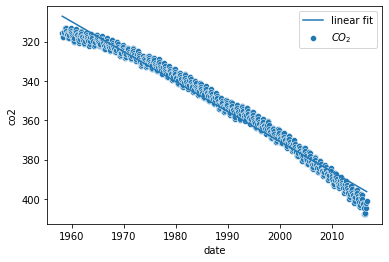

In [152]:
fig, ax = plt.subplots()

sns.scatterplot(data=co2_data, x='date', y='co2', label=r'$CO_2$', ax=ax)
sns.lineplot(data=co2_data, x='date', y='co2_pred', label='linear fit', color = 'red', ax=ax)

# plt.xticks()
fig.show()

### (b)

### (c)

### (d)

### (e)

## Problem 3.1: BPP Data Analysis

### (a)

### (b)

### (c)

### (d)

### (e)

### (f)